# Cyclistic Case Study

### About the company

A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself
apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with
disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about
8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to
commute to work each day.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.



### The business task

Converting more casual riders to annual members by indentify how the two types of riders use Cyclistic bike differently by analysing the data from the previous year (2021).

## The analysis process

Importing the libraries

In [2]:
from datetime import datetime
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Creating the dataset by adding all the .csv files in one data frame

In [3]:
path = './all_data_sets'

# Ignore hidden files
files = [file for file in os.listdir(path) if not file.startswith('.')] 

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + '/' + file)
    all_months_data = pd.concat([all_months_data, current_data])





In [4]:
# Let's see our data
all_months_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


### Cleaning the data

First thing first I want to identify the first occurance of each unique station name because I want that each station name to have the exact coordinates. If we look into the data besides the NaN values we see some iregularities with latitude and longitude registered for different rides, for the same station.

In [47]:
stations_df = all_months_data.groupby('start_station_name').first()
stations_df

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
start_station_name,,,,,,,,,,,,
2112 W Peterson Ave,D5D0EA54A54A180E,electric_bike,2021-01-11 13:01:18,2021-01-11 13:13:10,KA1504000155,Western Ave & Lunt Ave,RP-005,41.991229,-87.683616,42.008599,-87.690342,member
351,5E181D51F7C391F4,electric_bike,2021-08-04 16:31:29,2021-08-04 16:48:33,351,Mulligan Ave & Wellington Ave,351,41.930000,-87.780000,41.930000,-87.780000,casual
63rd St Beach,53D868F88EFFD791,classic_bike,2021-01-13 14:16:07,2021-01-13 14:31:15,15491,Ellis Ave & 58th St,TA1309000011,41.781016,-87.576120,41.788746,-87.601334,member
900 W Harrison St,04C6476E39E9010E,classic_bike,2021-01-01 10:47:43,2021-01-01 10:53:37,13028,Loomis St & Lexington St,13332,41.874754,-87.649807,41.872187,-87.661501,member
Aberdeen St & Jackson Blvd,D6A582759B118BFA,classic_bike,2021-01-13 12:34:11,2021-01-13 12:46:53,13157,Clark St & Lake St,KA1503000012,41.877726,-87.654787,41.886021,-87.630876,member
...,...,...,...,...,...,...,...,...,...,...,...,...
Woodlawn Ave & 55th St,702B629A750AAA44,classic_bike,2021-01-22 11:58:42,2021-01-22 12:01:00,TA1307000164,Ellis Ave & 55th St,KA1504000076,41.795264,-87.596471,41.794301,-87.601450,member
Woodlawn Ave & 75th St,E60D65A41077BC96,classic_bike,2021-01-03 00:06:23,2021-01-03 03:16:48,569,Michigan Ave & 114th St,20243,41.759160,-87.595751,41.687015,-87.621052,casual
Woodlawn Ave & Lake Park Ave,683EB659EDC6922A,classic_bike,2021-01-08 13:24:54,2021-01-08 13:47:36,KA1503000065,Wabash Ave & Cermak Rd,TA1305000001,41.814093,-87.597005,41.852619,-87.626488,member


So it's seems like we have 847 unique stations. Now let's uniforme the info regards the latitude and longitude for each start station

In [48]:
# start lat
for i in stations_df.index:
    lat = stations_df.loc[i]['start_lat']
    all_months_data['start_lat'] = np.where(all_months_data['start_station_name'] == i, lat, all_months_data['start_lat'])

In [49]:
# start_lng
for i in stations_df.index:
    lng = stations_df.loc[i]['start_lng']
    all_months_data['start_lng'] = np.where(all_months_data['start_station_name'] == i, lng, all_months_data['start_lng'])

Now let's do the same thing for the end stations

In [50]:
stations_df = all_months_data.groupby('end_station_name').first()
stations_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
end_station_name,,,,,,,,,,,,
2112 W Peterson Ave,455A5CCB7C12AE9B,electric_bike,2021-01-03 12:52:00,2021-01-03 13:04:02,Clark St & Berwyn Ave,KA1504000146,KA1504000155,41.977997,-87.668047,41.991131,-87.683570,member
63rd St Beach,ABBB0089F65D9F28,classic_bike,2021-01-18 14:51:32,2021-01-18 15:29:34,Fort Dearborn Dr & 31st St,TA1307000048,15491,41.838556,-87.608218,41.781016,-87.576120,member
900 W Harrison St,5B110F8AC52FB353,electric_bike,2021-01-14 10:57:06,2021-01-14 11:13:07,Shields Ave & 31st St,KA1503000038,13028,41.838464,-87.635406,41.874775,-87.649720,member
Aberdeen St & Jackson Blvd,882B5F0EF13F24C8,classic_bike,2021-01-07 21:53:59,2021-01-07 22:00:24,Franklin St & Jackson Blvd,TA1305000025,13157,41.877708,-87.635321,41.877726,-87.654787,member
Aberdeen St & Monroe St,9B88D22CF570117B,electric_bike,2021-01-06 10:44:10,2021-01-06 10:55:14,Wood St & Chicago Ave,637,13156,41.895628,-87.672353,41.880613,-87.655964,member
...,...,...,...,...,...,...,...,...,...,...,...,...
Woodlawn Ave & 55th St,270B265F29BE5DD5,classic_bike,2021-01-08 11:08:17,2021-01-08 11:15:15,Dorchester Ave & 49th St,KA1503000069,TA1307000164,41.805772,-87.592464,41.795264,-87.596471,member
Woodlawn Ave & 75th St,6C2B6E0A85A2D245,classic_bike,2021-01-02 23:11:55,2021-01-03 00:05:37,Cottage Grove Ave & 111th Pl,20131,569,41.691710,-87.610002,41.759160,-87.595751,casual
Woodlawn Ave & Lake Park Ave,E2DBD668B179B512,classic_bike,2021-01-13 14:56:18,2021-01-13 15:43:48,Shields Ave & 31st St,KA1503000038,KA1503000065,41.838464,-87.635406,41.814093,-87.597005,member


In [51]:
# end lat
for i in stations_df.index:
    lat = stations_df.loc[i]['end_lat']
    all_months_data['end_lat'] = np.where(all_months_data['end_station_name'] == i, lat, all_months_data['end_lat'])

In [52]:
# end_lng
for i in stations_df.index:
    lng = stations_df.loc[i]['end_lng']
    all_months_data['end_lng'] = np.where(all_months_data['end_station_name'] == i, lng, all_months_data['end_lng'])

Let's check if there are NaN values in our data

In [53]:
nan_df = all_months_data[all_months_data.isna().any(axis = 1)]
nan_df

# apparently there are some end stations name and id's that have NaN values

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.90,-87.70,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247531,08E5EC2EC583D230,electric_bike,2021-12-17 07:55:47,2021-12-17 08:03:45,Canal St & Madison St,13341,NaN,NaN,41.881849,-87.640216,41.89,-87.62,casual
247533,DFE48801A70DFEA7,electric_bike,2021-12-23 21:28:41,2021-12-23 21:36:27,Canal St & Madison St,13341,NaN,NaN,41.881849,-87.640216,41.88,-87.65,casual
247534,92BBAB97D1683D69,electric_bike,2021-12-24 15:42:09,2021-12-24 19:29:35,Canal St & Madison St,13341,NaN,NaN,41.881849,-87.640216,41.88,-87.64,casual
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.881849,-87.640216,41.89,-87.61,casual


In [54]:
all_months_data.dropna( inplace = True)

# Making shure we get rid of all NaN values

all_months_data[all_months_data.isna().any(axis = 1)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


Let's look if we have any duplicate ride ids

In [55]:
if all_months_data.nunique()['ride_id'] == len(all_months_data):
    print('No duplicate values')
else:
    print('There are duplicate values')

# There is no duplicate value

No duplicate values


Let's see if started_at and ended_at columns are the right type of data format

In [5]:
type(all_months_data['started_at'].iloc[0])

# It seems like the started_at data format is Object, wee need to change it as a date time

str

In [57]:
all_months_data['started_at'] = pd.to_datetime(all_months_data['started_at'])
all_months_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900341,-87.696743,41.899181,-87.672200,member
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900341,-87.696743,41.910435,-87.696890,member
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900341,-87.696743,41.899181,-87.672200,casual
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900341,-87.696743,41.899181,-87.672200,casual
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900341,-87.696743,41.899181,-87.672200,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247528,E06135F650553F21,electric_bike,2021-12-07 15:55:37,2021-12-07 16:00:17,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881849,-87.640216,41.888716,-87.644448,casual
247532,8DF0DBB049906332,electric_bike,2021-12-01 16:50:52,2021-12-01 16:55:18,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881849,-87.640216,41.888716,-87.644448,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.881849,-87.640216,41.889177,-87.638506,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881849,-87.640216,41.879816,-87.629438,member


In [58]:
# Now we are doing the same to the ended_at

all_months_data['ended_at'] = pd.to_datetime(all_months_data['ended_at']) 

Let's add a new column to our data frame where we can store the duration of trips
The reason we are doing that, is to check if there are some anomalies with our data, like very long trips, or to little

In [59]:
all_months_data['duration'] = round(((all_months_data['ended_at'] - all_months_data['started_at']) / np.timedelta64(1, 's')) / 60, 2)
all_months_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900341,-87.696743,41.899181,-87.672200,member,7.22
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900341,-87.696743,41.910435,-87.696890,member,4.53
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900341,-87.696743,41.899181,-87.672200,casual,9.78
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900341,-87.696743,41.899181,-87.672200,casual,8.95
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900341,-87.696743,41.899181,-87.672200,casual,10.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247528,E06135F650553F21,electric_bike,2021-12-07 15:55:37,2021-12-07 16:00:17,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881849,-87.640216,41.888716,-87.644448,casual,4.67
247532,8DF0DBB049906332,electric_bike,2021-12-01 16:50:52,2021-12-01 16:55:18,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881849,-87.640216,41.888716,-87.644448,casual,4.43
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.881849,-87.640216,41.889177,-87.638506,member,7.02
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881849,-87.640216,41.879816,-87.629438,member,8.28


Now let's see if there are wrong data or if there are too long period of times or too little

In [60]:
#pd.set_option('display.max_row', None)  to view all the lines
all_months_data.sort_values(by = ['duration'])



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
142091,FD8AF7324ABAE9DA,electric_bike,2021-11-07 01:56:51,2021-11-07 01:00:57,Clark St & North Ave,13128,Larrabee St & Webster Ave,13193,41.911898,-87.631956,41.921822,-87.644140,casual,-55.90
125855,508B09A5FB0737DC,classic_bike,2021-11-07 01:54:50,2021-11-07 01:00:45,Sedgwick St & Webster Ave,13191,Sedgwick St & North Ave,TA1307000038,41.922167,-87.638888,41.911386,-87.638677,member,-54.08
260820,6F9E76F5EDAAC1B8,electric_bike,2021-11-07 01:55:42,2021-11-07 01:01:55,Milwaukee Ave & Wabansia Ave,13243,Western Ave & Division St,13241,41.912591,-87.681353,41.902893,-87.687275,member,-53.78
282673,7AECC76D1562B51C,classic_bike,2021-11-07 01:54:58,2021-11-07 01:01:29,Sheffield Ave & Wrightwood Ave,TA1309000023,Southport Ave & Wellington Ave,TA1307000006,41.928712,-87.653833,41.935733,-87.663576,casual,-53.48
104018,CDB307B8494885AD,electric_bike,2021-11-07 01:55:09,2021-11-07 01:02:26,Sedgwick St & Webster Ave,13191,Halsted St & Roscoe St,TA1309000025,41.922167,-87.638888,41.943670,-87.648950,casual,-52.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640346,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,Kedzie Ave & Milwaukee Ave,13085,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.929567,-87.707857,41.889955,-87.680651,casual,49107.15
81713,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886021,-87.630876,41.889955,-87.680651,casual,52701.38
46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,-87.627844,41.872596,-87.633502,casual,53921.60
545476,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,-87.612043,41.889955,-87.680651,casual,55691.68


So it's seems like there are some strange duration times
For the '-' probably the columns ended_at and started_at switched, so we need to switch back
For the long periods probably the system doesn't record the ended-at correctly, so I need to ditch that lines
For the long periods I will take in consideration a maximum of two hours aka 120 minutes because the 20 mile is the perfect length for a bike ride and even for the casual riders 10 mile take 45 to 60 minutes maximum (https://www.outsideonline.com/culture/opinion/the-perfect-bike-ride-is-20-miles/) and three hours are plenty enough, even for casual users to complete this distance
To be notice that in the data, the casual riders have the nonsens duration periods

In [61]:
# For the duration periods that have - values
all_months_data['ended_at_copy'] = all_months_data['ended_at']
all_months_data['ended_at'] = np.where(all_months_data['duration'] < 0, all_months_data['started_at'], all_months_data['ended_at'])
all_months_data['started_at'] = np.where(all_months_data['duration'] < 0, all_months_data['ended_at_copy'], all_months_data['started_at'])
all_months_data.drop('ended_at_copy', axis = 1, inplace = True)



In [62]:
all_months_data.drop('duration', axis = 1, inplace = True)# we drop the old column to recalculate the correct length durations
all_months_data['duration'] = round(((all_months_data['ended_at'] - all_months_data['started_at']) / np.timedelta64(1, 's')) / 60, 2)
all_months_data.sort_values(['duration'])

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
591205,0C32DAA0DDCAA66B,electric_bike,2021-09-05 15:16:10,2021-09-05 15:16:10,Sheffield Ave & Wrightwood Ave,TA1309000023,Sheffield Ave & Wrightwood Ave,TA1309000023,41.928712,-87.653833,41.928712,-87.653833,casual,0.00
368130,0640A2A0D4A2CD86,classic_bike,2021-09-25 20:43:04,2021-09-25 20:43:04,Artesian Ave & Hubbard St,15664,Artesian Ave & Hubbard St,15664,41.889492,-87.688219,41.889522,-87.688354,member,0.00
60891,3F02776D0D38F96E,classic_bike,2021-01-29 21:02:41,2021-01-29 21:02:41,Loomis St & Lexington St,13332,Loomis St & Lexington St,13332,41.872187,-87.661501,41.872187,-87.661501,member,0.00
361282,A98F57CCF03327E4,classic_bike,2021-05-22 19:00:48,2021-05-22 19:00:48,Wells St & Polk St,SL-011,Wells St & Polk St,SL-011,41.872445,-87.633927,41.872596,-87.633502,member,0.00
22429,EDB619E8797A7368,electric_bike,2021-04-23 11:30:54,2021-04-23 11:30:54,Clinton St & Lake St,13021,Clinton St & Lake St,13021,41.885459,-87.641879,41.885773,-87.642754,casual,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640346,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,Kedzie Ave & Milwaukee Ave,13085,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.929567,-87.707857,41.889955,-87.680651,casual,49107.15
81713,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886021,-87.630876,41.889955,-87.680651,casual,52701.38
46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,-87.627844,41.872596,-87.633502,casual,53921.60
545476,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,-87.612043,41.889955,-87.680651,casual,55691.68


Now it seems like we have duration 0 in our data. For a ride to be accountable I will take into account only the rides that have a duration of minimum 5 minutes

In [63]:
# For the rows that have a duration smaller than 5 minutes we replace the 0 with NaN and then drop them

all_months_data['duration'] = np.where(all_months_data['duration'] < 5, np.nan, all_months_data['duration'])
all_months_data.dropna(axis = 'index', inplace = True)

Let's get rid of the rows who have rides that are longer than 120 minutes

In [64]:
all_months_data['duration'] = np.where(all_months_data['duration'] > 120, np.nan, all_months_data['duration'])
all_months_data.dropna(axis = 'index', inplace = True)
all_months_data.sort_values(by = ['duration'])

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
727239,9BCC85A804FF3AED,electric_bike,2021-08-03 18:34:57,2021-08-03 18:39:57,Clinton St & Lake St,13021,Kingsbury St & Erie St,13265,41.885459,-87.641879,41.893808,-87.641697,member,5.0
234754,266A2A45CDC9C105,classic_bike,2021-11-16 08:57:50,2021-11-16 09:02:50,Ellis Ave & 53rd St,KA1503000052,Ellis Ave & 58th St,TA1309000011,41.799336,-87.600958,41.788746,-87.601334,member,5.0
504738,8ED1934B63A10DFD,classic_bike,2021-06-05 18:32:01,2021-06-05 18:37:01,Clark St & North Ave,13128,Clark St & North Ave,13128,41.911898,-87.631956,41.911974,-87.631942,casual,5.0
474518,D4BFF1946FFA7D83,electric_bike,2021-07-25 13:16:47,2021-07-25 13:21:47,Kingsbury St & Kinzie St,KA1503000043,Larrabee St & Division St,KA1504000079,41.889177,-87.638506,41.903486,-87.643353,casual,5.0
46886,DF5D51EC633D38F2,classic_bike,2021-12-13 16:52:29,2021-12-13 16:57:29,LaSalle St & Washington St,13006,Canal St & Madison St,13341,41.882664,-87.632530,41.882091,-87.639833,member,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225473,D97C360FA3D1DFE8,docked_bike,2021-03-20 19:21:21,2021-03-20 21:21:21,Franklin St & Adams St (Temp),TA1309000008,Dearborn St & Adams St,TA1305000005,41.879434,-87.635504,41.879356,-87.629791,casual,120.0
83469,62CB0261501E6886,classic_bike,2021-12-27 09:19:08,2021-12-27 11:19:08,Laramie Ave & Kinzie St,530,Kedzie Ave & Milwaukee Ave,13085,41.887832,-87.755527,41.929567,-87.707857,casual,120.0
402809,18109A0A8BF4251C,docked_bike,2021-10-10 20:05:04,2021-10-10 22:05:04,Cityfront Plaza Dr & Pioneer Ct,13427,Rush St & Superior St,15530,41.890573,-87.622072,41.895426,-87.625877,casual,120.0
518766,F1F83DE2A2513191,classic_bike,2021-09-04 13:38:32,2021-09-04 15:38:32,Michigan Ave & Washington St,13001,Millennium Park,13008,41.883984,-87.624684,41.881032,-87.624084,casual,120.0


### The Analysis Phase




In [96]:
# I store the station points in a different dataframe, to use them latter in a geographical plot to see how the station are displayed

station = all_months_data.groupby('start_station_name').first()
station.to_excel('station.xlsx')

<img src="map.png" style="width:1000px;height:500px;">

Our goal is to idetify differences between members and casual riders in terms of how do they use Cyclistic

In [65]:
# Because we only have the ride id I want to see how many rides are made by members and how many by casual riders
all_months_data['member_casual'].value_counts()

member    2032605
casual    1846279
Name: member_casual, dtype: int64

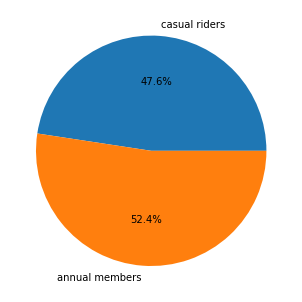

In [66]:
# Now let's plot this data to get more sense from it

member = all_months_data['member_casual'].value_counts()['member']
casual = all_months_data['member_casual'].value_counts()['casual']

label = ['casual riders', 'annual members']
values = [casual, member]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.pie(values, labels = label, autopct = '%1.1f%%')
plt.show()

Apparently there are 4.8% more members then casual riders

Now I want to know the average time ride per type of rider

In [69]:
# Now let's see the average time per type of rider

all_months_data.groupby('member_casual').mean()['duration'] # to display the result in minutes not seconds

member_casual
casual    24.927624
member    15.167492
Name: duration, dtype: float64

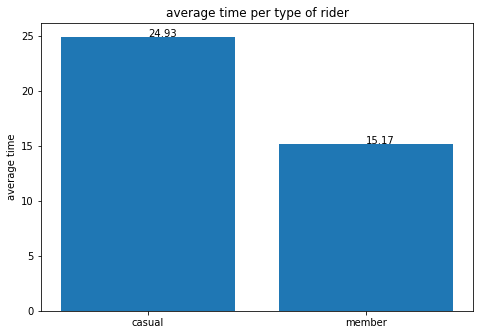

In [70]:
# Let's visualise our data
casual = round(all_months_data.groupby('member_casual').mean()['duration']['casual'], 2)
member = round(all_months_data.groupby('member_casual').mean()['duration']['member'], 2)

label = ['casual', 'member']
values = [casual, member]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label, height = values)
ax.set_ylabel('average time')
ax.text(0, values[0], casual) #to display the exact value on the column
ax.text(1, values[1], member)
ax.set_title('average time per type of rider')
plt.show()


As is shown seems like casual riders spend with 9 minutes more time on bike rides then the members.
Because the <b>casual riders</b> are the people who purchase 'all day pass' or 'one ride pass' I guess they are using the bikes on parks or in their free time and tacking long rides to entertain them
and the <b>members</b> use the Cyclistic more out of need and like a transportation method from point A to point B, or to stay healthy and perform bike exercises like a daily routine.

We will see if that it's true or not

Now let's see how time is distributed per type of rider

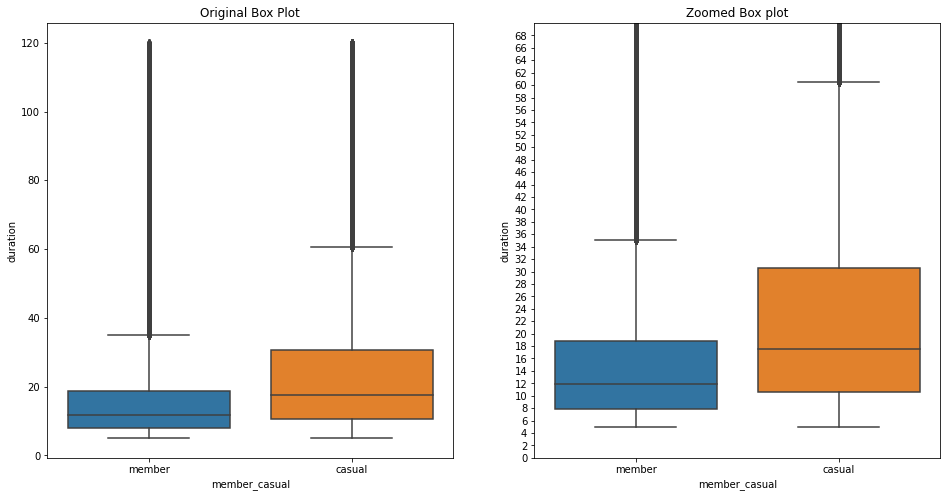

In [71]:
# So we know we limited our duration from 5 to 120 min
# So I don't need the outliers from this plot I Want to know how our data looks, so let's zoom in a little bit
# So I will display the original box plot and the zoomed one

fig, axes = plt.subplots(1,2, figsize = (16, 8))
sns.boxplot(x = 'member_casual', y = 'duration', data = all_months_data, ax = axes[0])
axes[0].set_title('Original Box Plot')


sns.boxplot(x = 'member_casual', y = 'duration', data = all_months_data, ax = axes[1])
axes[1].set_ylim([0, 70])
axes[1].set_title('Zoomed Box plot')
axes[1].set_yticks(range(0, 70, 2))
plt.show()

So it seems I was correct guessing. Members tend to use bikes shorter amounts of time probably like a transportation method (because 50% of our data is bellow 12 min), or for daily sport routine ( 50% of our data is in 12 to 36 minutes range), instead casual users use Cyclistc in their free time like an entertaiment method (their average time is higher by 9 minutes as it shown in the bar plot from above the box plot, and because 50% of data is in range 17 to 61 minutes).

Let's see what type of bike is preferable for the riders

In [72]:
# To see how many rides were performed and with what type of bike
all_months_data['bike_counter'] = 1

all_months_data.groupby(['member_casual', 'rideable_type']).sum()['bike_counter']



member_casual  rideable_type
casual         classic_bike     1145399
               docked_bike       279230
               electric_bike     421650
member         classic_bike     1596411
               electric_bike     436194
Name: bike_counter, dtype: int64

In [73]:
all_months_data.drop('bike_counter', axis = 1, inplace =True)

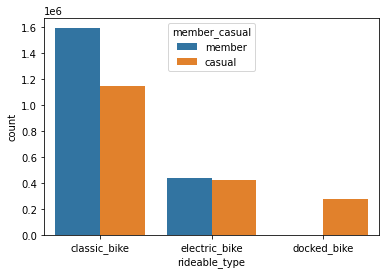

In [74]:
sns.countplot(x = 'rideable_type', hue = 'member_casual', data = all_months_data)
plt.show()

In this analysis I refer to <b>docked_bike</b> as an a <b>bike with attach</b>
It seems like electrical bikes are equali preferred by both categories, instead classical bike are more preferred by the members and docked_bike are used only the casual riders. This last observation reinforce my belive that the casual riders use bike in their free time.

Now let's see how many rides have the return point the same as the start point and let's split the data by member type

In [95]:

all_months_data['station'] = 'the same'
all_months_data['station'] = np.where(all_months_data['start_station_name'] == all_months_data['end_station_name'], 'different', 'the same')



all_months_data.groupby(['member_casual', 'station']).mean()['duration']

member_casual  station  
casual         different    44.969366
               the same     22.956481
member         different    26.876525
               the same     14.823087
Name: duration, dtype: float64

Text(0.5, 1.0, 'Station Preferability')

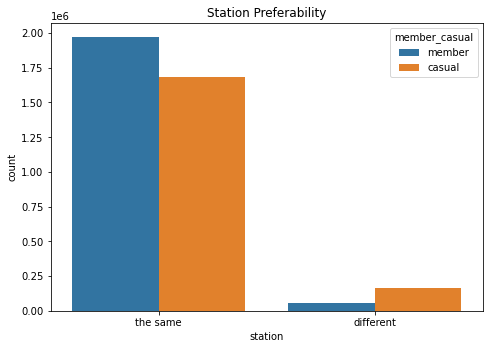

In [80]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sns.countplot(x = 'station', hue = 'member_casual', data = all_months_data)
ax.set_title('Station Preferability')

From the result above the chart it seem's like in both cases when riders choose to end the trip in different stations the average duration doubles. From the chart we understand the fact that both, casual and members, preffer to return to the same station. In this case my previous guess need's to be adjusted, so it seems members use their membership to stay healthy and they are going for a short ride like a daily routine and to little use the Cyclistic as a transportation method (for job, or relatives). In casual riders case they enjoy short rides with returning point the same as the start. In their case, judging the average time for the different end point (44 minutes), we cannot say that they use Cyclistic as a transportation method (i.e. for job).

## My Recomandation

Let's recap:
- Cyclistic have more members by 4.8% then casual riders, so users are somehow evenly distributed. It's not such a higher procent, especially as the company's goal is to convert more casual riders to members, but this means it's a lot space to improve this.
- Members don't use at all bikes with attach (like motorcycle) and casual riders use them very rare (at every 6 rides there is 1 with attach), electrical bikes are evently preffered by members and casual riders but the numbers are low (1 out of 4 member rides are with electrical bikes meanwhile 1 out of 3 casual rides are with the same type of bike). The clasical bike is top 1 choice for both, casual and members
- Majority preffer to return to the same point that the ride start, very few casual riders choose to end the trip on another point and even fewer members preffer another end point
- For members when the end point is the same with the start the average trip duration is about 14 minutes, and when differ is about 26 (almost double).
- For casual riders when the end point is the same with the start the average trip duration is about 22 minutes, and when differ is about 44 (almost double).

My ideas based on these key findings:
- Members use Cyclistic more to do tiny sesion of sport, like a daily routine. Few use Cyclistic like a transportation method (i.e. for work, to meet friends)
- Casual riders use Cyclistic in their free time for entertaiment. Based on the fact that average ride duration is 44 minutes when the end point is different than the start point I say that casual don't use at all Cyclistic like a transportation method

My recommandation for marketing team to convert more casual riders to members:
- To promovate daily sport routine and healthy life style in ad campaigns
- To promovate bike rides like an alternative transportation method
